In [71]:
##http://tiny.cc/LogReg


In [103]:
#**Problem Statement**
# The problem that we are going to solve here is that given a set of features that describe a claimant who is going to claim for the insurance amount, our machine learning model must predict whether the claimant will hire an attorney or not to run the case. 
# To train our machine learning model with insurance data, we will be using [ClaimantsData](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv)




In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [105]:
data=pd.read_csv(r"https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/claimants.csv")
data.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [106]:
data.shape

(1340, 7)

In [107]:
data.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [108]:
## droping the case number column
data.drop(['CASENUM'],axis=1,inplace=True)
data.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [109]:
data.shape

(1340, 6)

In [110]:
# checking the description
data.describe()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


In [111]:
#checking for the mising values
data.isnull().sum()


ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [112]:
## data['CLMSEX']=data['CLMSEX'].fillna()
## data['CLMINSUR']=data['CLMINSUR'].fillna()

In [113]:
data.CLMSEX.value_counts().index[0]

1.0

In [114]:
data.CLMSEX.value_counts()

1.0    742
0.0    586
Name: CLMSEX, dtype: int64

In [115]:
data.CLMINSUR.value_counts()

1.0    1179
0.0     120
Name: CLMINSUR, dtype: int64

In [116]:
# creating a user defined function for imputing the mising values
# with mode(numerical & categorical data)
def fill_na(col):
    col.fillna(col.value_counts().index[0],inplace=True)
    return col
data.apply(lambda col:fill_na(col))
data.isnull().sum()   

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

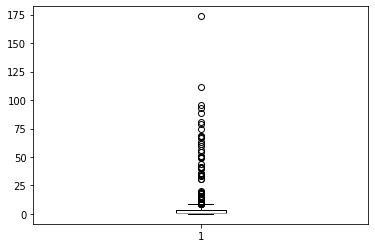

In [117]:
## loss column
plt.boxplot(data.LOSS)
plt.show()

###### outliers also missing values -->Imputation
- winsorization -->outliers are replaced with next small value
- example:[1,2,3,4,5,6,78,89,9000]-->9000 as an outlier-->9000 will be replace with 89
-    one analysis-->including outliers
-    one analysis--->drop al the outliers

In [118]:
#split the data into input and output
x = data.iloc[:,1:]
x.head()

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0.0,1.0,0.0,50.0,34.940
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038


In [119]:
#split the data into input and output
X = data.iloc[:,1:]
y = data.ATTORNEY
y

0       0
1       1
2       1
3       0
4       1
       ..
1335    1
1336    0
1337    1
1338    0
1339    1
Name: ATTORNEY, Length: 1340, dtype: int64

In [150]:
#iloc-row indices,column indices
data.iloc[1:] # indices of the columns which we need to access

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
5,0,1.0,1.0,0.0,35.0,0.309
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,10.0,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [121]:
# iloc-row indices ,column indices
data.iloc[1:, 1:]# indices of the columns which we need to access

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
1,1.0,0.0,0.0,18.0,0.891
2,0.0,1.0,0.0,5.0,0.330
3,0.0,1.0,1.0,31.0,0.037
4,0.0,1.0,0.0,30.0,0.038
5,1.0,1.0,0.0,35.0,0.309
...,...,...,...,...,...
1335,0.0,1.0,0.0,10.0,0.576
1336,1.0,1.0,0.0,46.0,3.705
1337,1.0,1.0,0.0,39.0,0.099
1338,1.0,0.0,0.0,8.0,3.177


In [122]:
## split the data into training and testing 
## build the model on training data and check the model performanceon the test data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X , y , test_size=0.3 , random_state=1)

In [123]:
# buid the classifier on the training data
# sklearn library  import ,instantiate ,fit
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
# predicting on train data
# syntax:objective,predict(Input)
y_train_pred=reg.predict(X_train)
y_train_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [125]:
# predicting on train data 
# syntax:objective.predict(Input)
y_train_pred=reg.predict(X_train)
y_train_pred


array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,

In [126]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_train,y_train_pred)
conf

array([[315, 170],
       [107, 346]], dtype=int64)

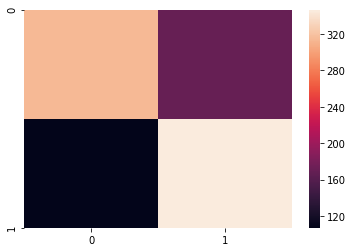

In [127]:
sns.heatmap(conf)

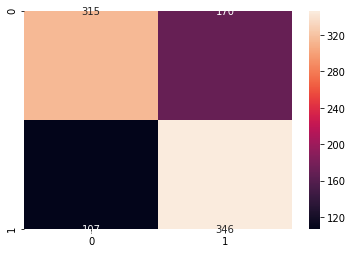

In [128]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f')

In [129]:
sns.heatmap(confusion_matrix(y_train,y_train_pred),annot=True,fmt='3.0f',annot_kws=('size':'20'))

SyntaxError: invalid syntax (<ipython-input-129-bc0291d582cb>, line 1)

In [130]:
## Acuracy -->TP+TN/TP+FP+TN+FN

(315+345)/(315+170+108+345)


0.7036247334754797

In [131]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_train_pred)

0.7046908315565032

In [148]:
# 1--->hiring an attorney
# 0-->not hiring an Attorney
# number of false positives

In [133]:
conf

array([[315, 170],
       [107, 346]], dtype=int64)

In [134]:
conf[0]

array([315, 170], dtype=int64)

In [135]:
conf[0][0]

315

In [136]:
conf[0][0]
conf[0][1]

170

In [137]:
print('true_postive=',conf[0][0])
print('false_positive=',conf[0][1])
print('false_negative=',conf[1][0])
print('true_negative=',conf[1][1])

true_postive= 315
false_positive= 170
false_negative= 107
true_negative= 346


In [146]:
true_positive=conf[0][0]
false_positive=conf[0][1]
false_negative=conf[1][0]
true_negative=conf[1][1]

In [142]:
## prediction rate

precision =true_positive/(true_positive+false_positive)
precision

0.6494845360824743

In [143]:
from sklearn.metrics import precision_score
precision_score(y_train,y_train_pred)

0.6705426356589147

In [147]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.7464454976303317

In [151]:
## https://docs.google.com/document/d/1HxVOet76LTHuV2hduXOq1W9uD1D_1rBimLlKK4avUAE/edit?usp=sharing


In [ ]:
## prediction